## Scenario
A real estate developer, Derek, is planning to start a new project to build family homes. He has access to historic data for the region in which he has acquired land for the project. The historic data includes the prices for houses sold in the area over a 10-year period. The data also includes information about the number of bedrooms in each house ranging from one to five rooms. Derek has asked you to analyse the data for any trends that might be evident. He wants to know the optimal number of bedrooms to maximise the profit for the project. In other words, Derek wants to know what the optimal amount of rooms per property should be to gain the highest profit. 

# Objective
In this activity, we will: 
- get to know the data
- define sub-data sets
- detect outliers
- remove outliers.

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()
sns.set_style("white")

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'


# Import the CSV file with Pandas.
data = pd.read_csv('Data/raw_sales.csv', index_col=['datesold'], parse_dates=['datesold'])

# View the DataFrame.
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [2]:
# Check for missing values
data[data.isna().any(axis=1)].shape

(0, 4)

<AxesSubplot:xlabel='datesold'>

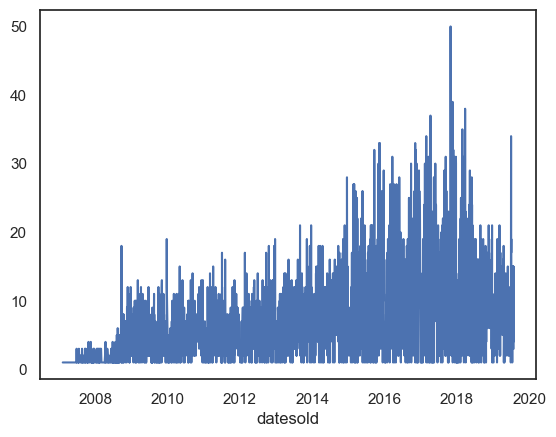

In [3]:
# Price entries by date
date_grouped = data.groupby(data.index)
sns.lineplot(data=date_grouped.size())

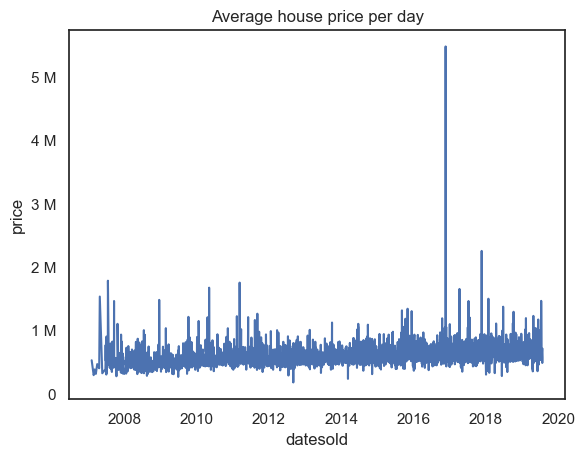

In [4]:
# Average price by date
avg_price = date_grouped['price'].aggregate('mean')
fig, ax = plt.subplots()
sns.lineplot(data=avg_price, ax=ax).set(title='Average house price per day')
ax.yaxis.set_major_formatter(ticker.EngFormatter())

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

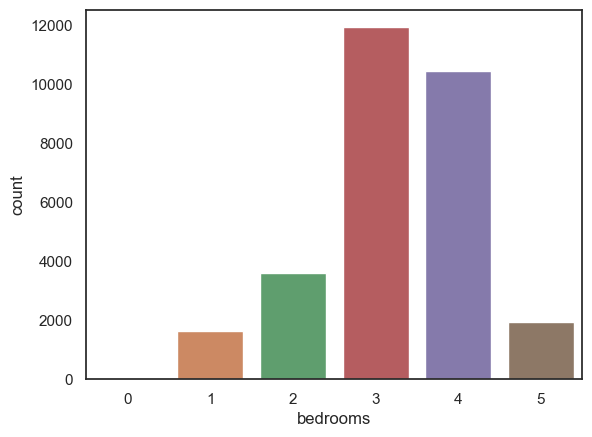

In [5]:
# Investigate number of houses per bedroom count
sns.countplot(x='bedrooms', data=data)

In [6]:
# Subset data into a df for each bedroom count
one_bed = data[data['bedrooms'] == 1].copy()
two_bed = data[data['bedrooms'] == 2].copy()
three_bed = data[data['bedrooms'] == 3].copy()
four_bed = data[data['bedrooms'] == 4].copy()
five_bed = data[data['bedrooms'] == 5].copy()

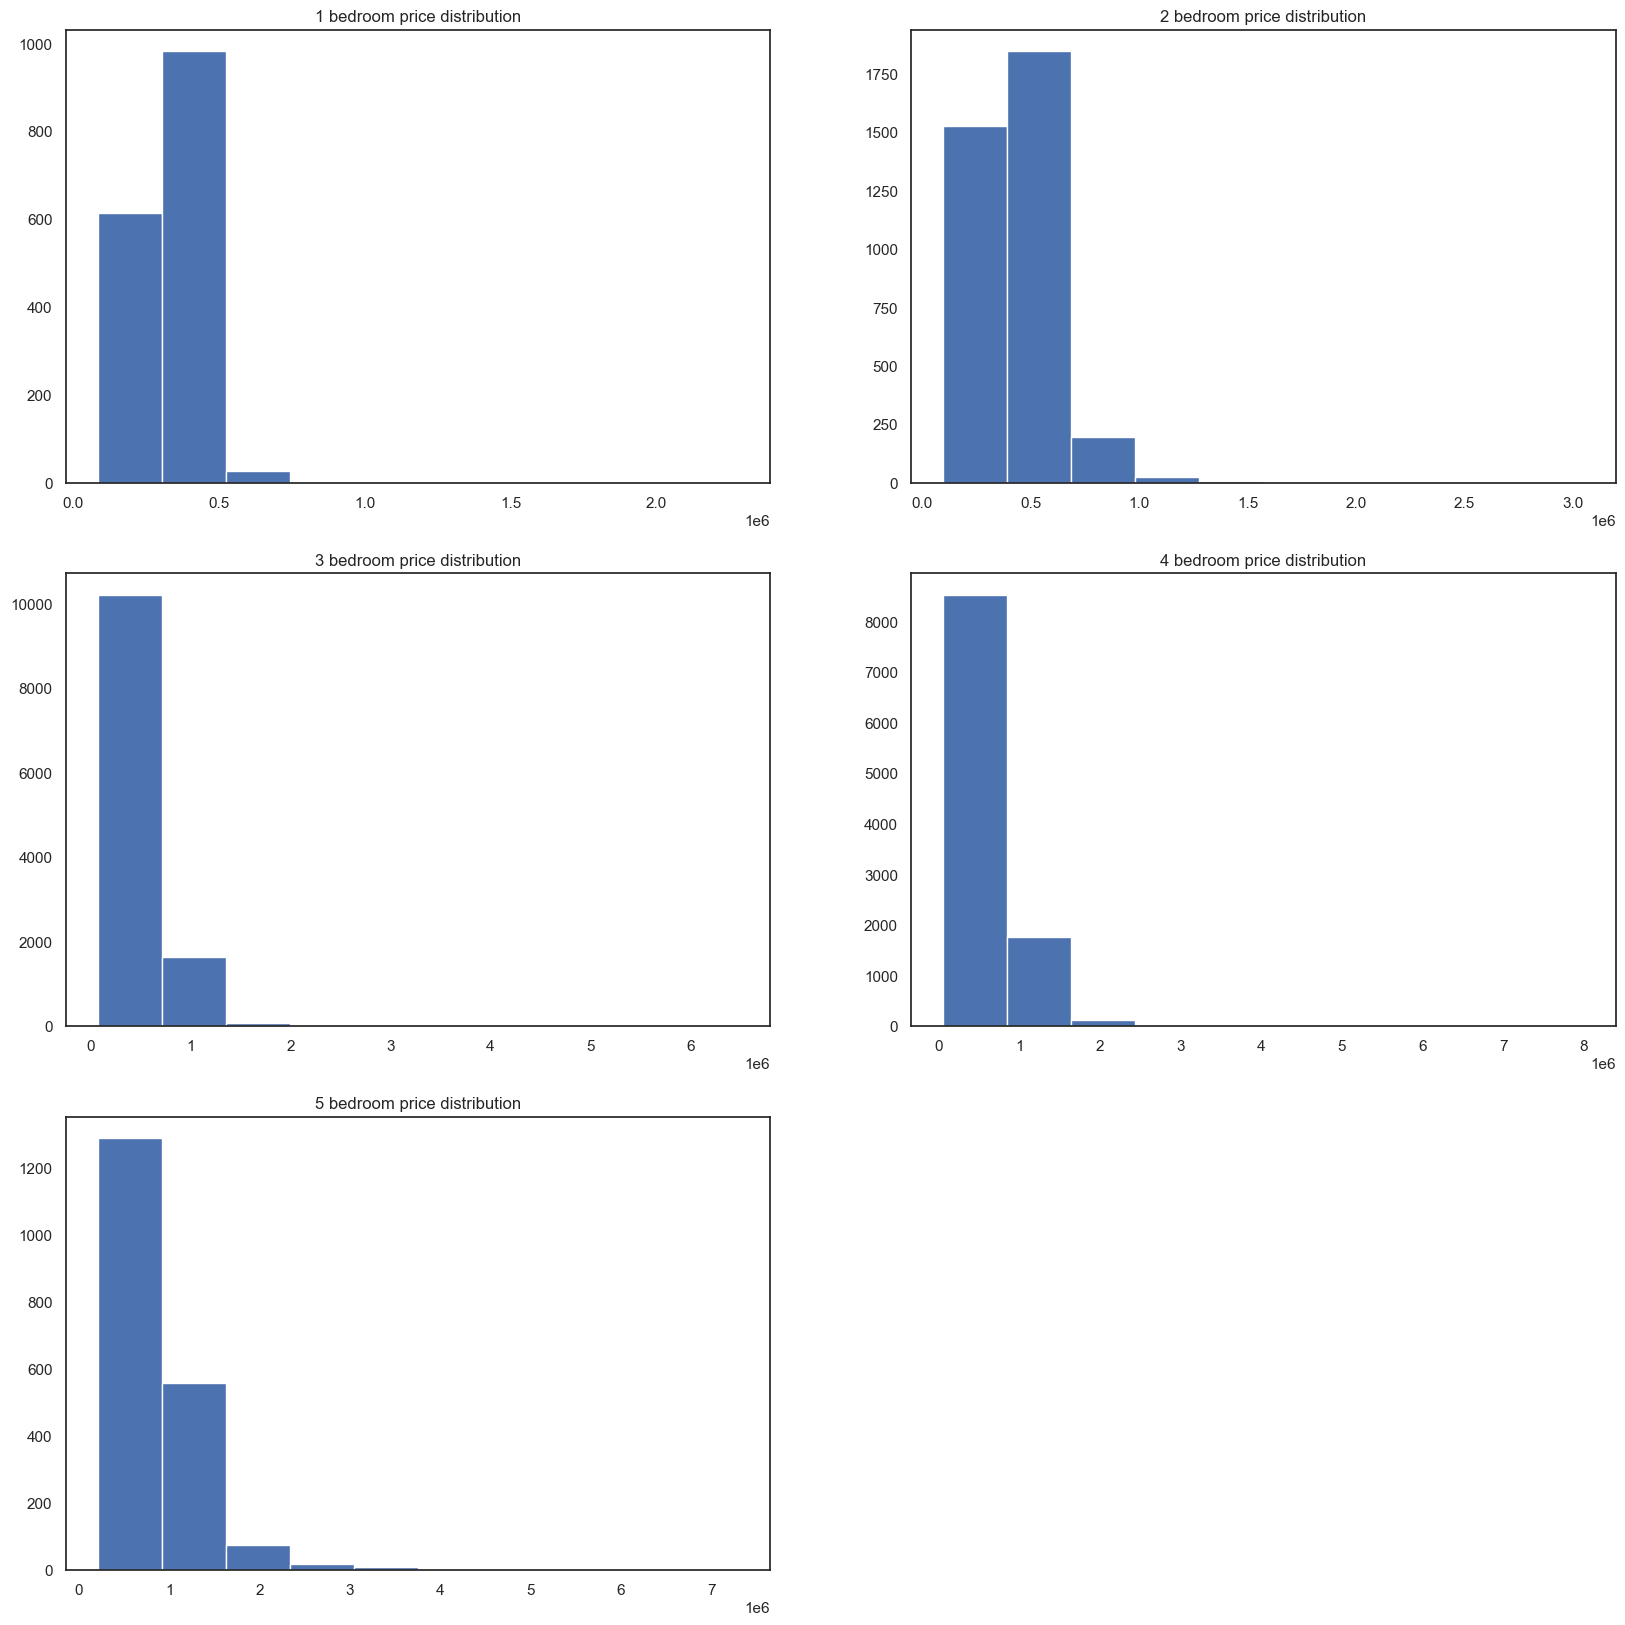

In [7]:
# Plot price distribution for each of the above dfs.
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20, 20))

axes[0][0].hist(one_bed['price'])
axes[0][1].hist(two_bed['price'])
axes[1][0].hist(three_bed['price'])
axes[1][1].hist(four_bed['price'])
axes[2][0].hist(five_bed['price'])

axes[0][0].title.set_text("1 bedroom price distribution")
axes[0][1].title.set_text("2 bedroom price distribution")
axes[1][0].title.set_text("3 bedroom price distribution")
axes[1][1].title.set_text("4 bedroom price distribution")
axes[2][0].title.set_text("5 bedroom price distribution")

fig.delaxes(axes[2][1])

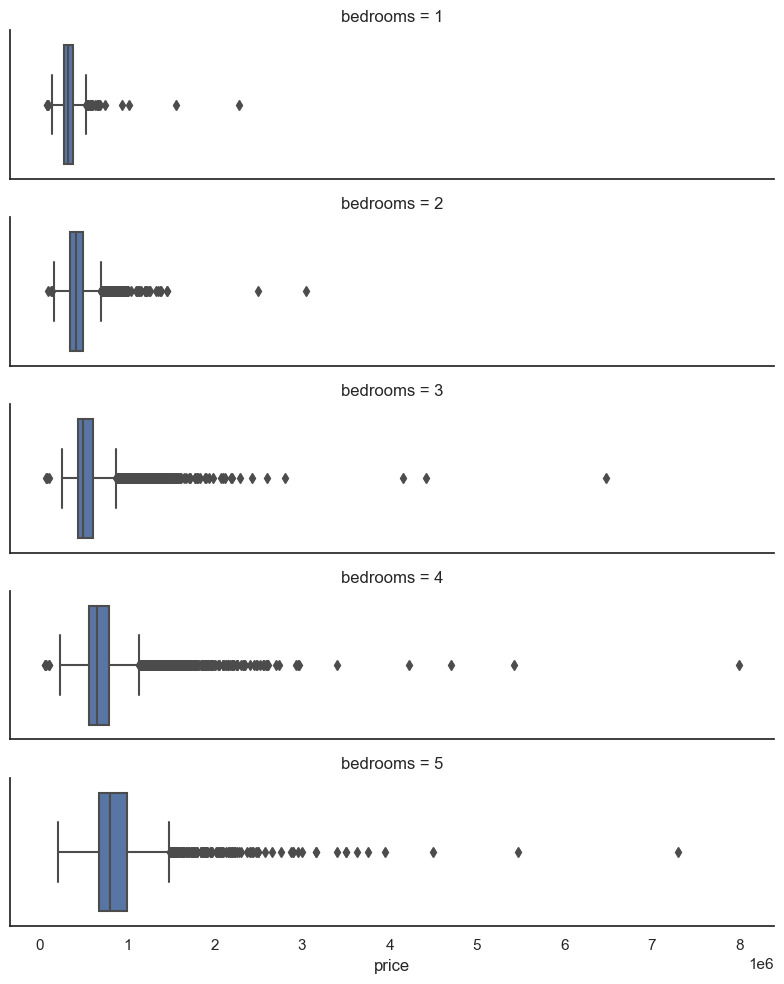

In [8]:
# Check boxplot for each set of bedroom counts using original dataset
grid = sns.FacetGrid(data[data['bedrooms'] > 0], row='bedrooms', height=2, aspect=4)
grid.map(sns.boxplot, 'price')

In [9]:
# Outlier removal required

# Define function to filter out outliers
def remove_outlier(df):
    # Get prices
    prices = df['price']
    # calculate quartiles, IQR and limits
    q1 = prices.quantile(0.25)
    q3 = prices.quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    
    # Filter dataset by limits
    df_filt = df[(prices > lower_limit) & (prices < upper_limit)]
    return df_filt

# Filter each dataset
one_bed_filt = remove_outlier(one_bed)
two_bed_filt = remove_outlier(two_bed)
three_bed_filt = remove_outlier(three_bed)
four_bed_filt = remove_outlier(four_bed)
five_bed_filt = remove_outlier(five_bed)

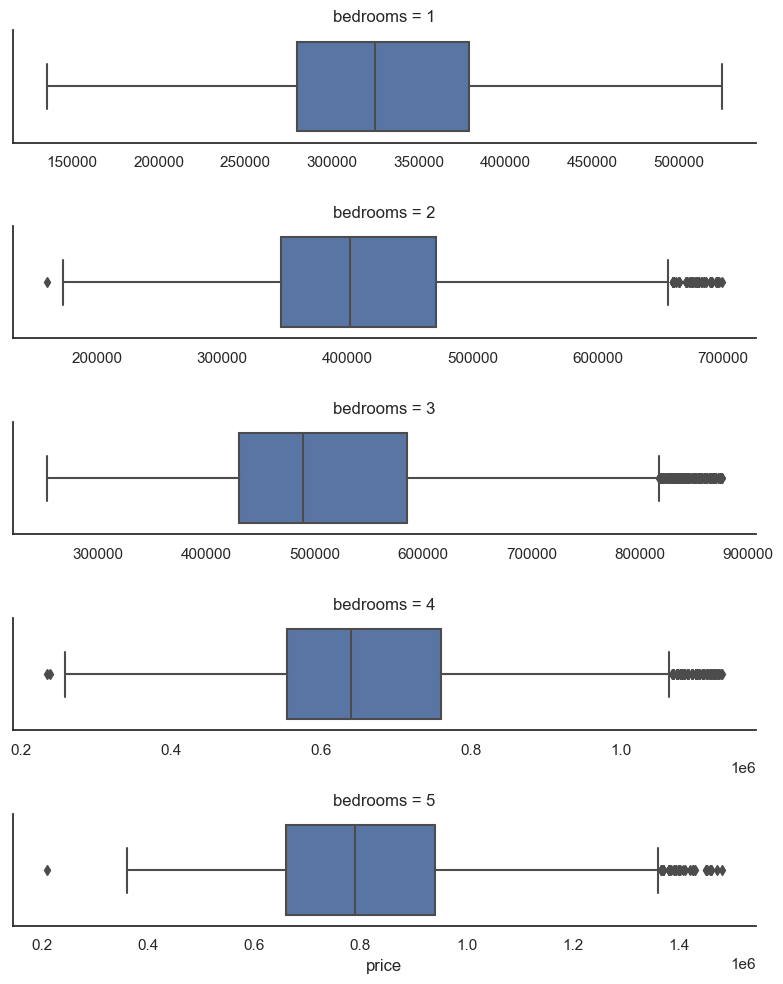

In [10]:
# Generate boxplot for each dataset after outlier removal.

data_filt = pd.concat([one_bed_filt, two_bed_filt, three_bed_filt,
                       four_bed_filt, five_bed_filt]).reset_index()

grid = sns.FacetGrid(data_filt, row='bedrooms', height=2, aspect=4, sharex=False)
grid.map(sns.boxplot, 'price')

## Scenario
You are continuing the project work with Derek, a real estate developer planning to build new houses. The historic data Derek has provided for the region he acquired the land for the project should now be clean and prepared for the time series moving average to forecast the house prices. The historic data includes the prices for houses sold in the area over a ten-year period. The data also includes information about the number of bedrooms in each house ranging from one to five rooms. Derek has asked you to analyse the data for any trends that might be evident. He wants to know what the optimal number of bedrooms should be to maximise the profit for the project.

### Objective
In this activity, we will be working with a time series moving average to forecast the prices of houses by:
- plotting the sub-data sets
- resampling to remove noise
- using a time series moving average.

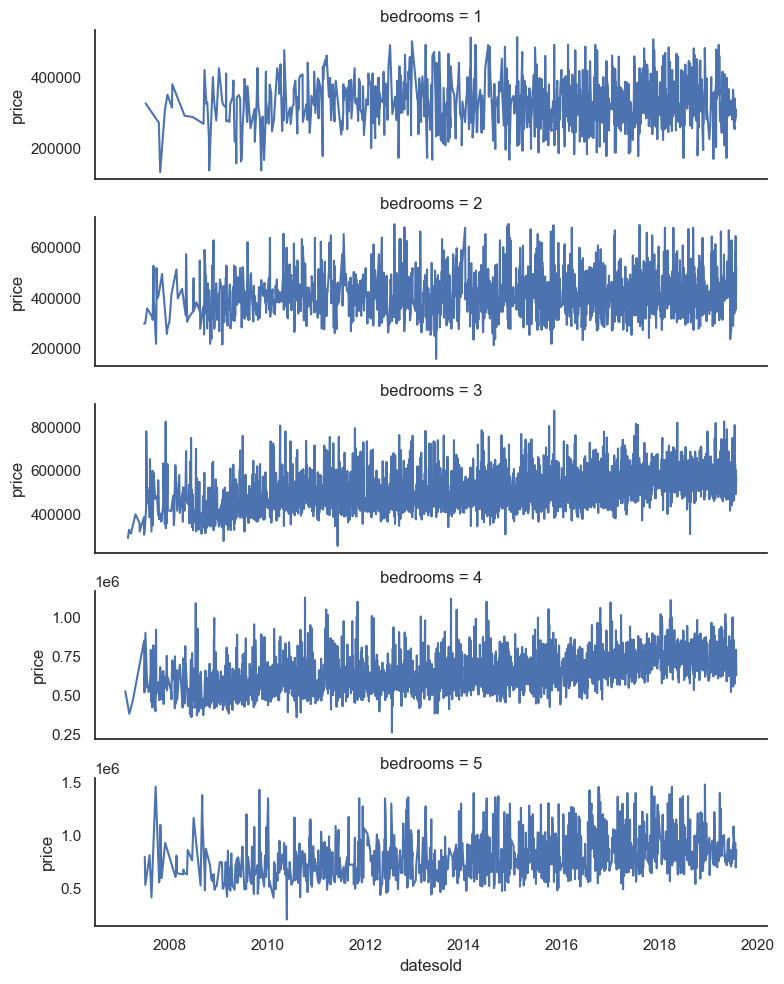

In [11]:
# Plot time series data per bedroom count
grid = sns.FacetGrid(data_filt, row='bedrooms', height=2, aspect=4, sharey=False)
grid.map(sns.lineplot, 'datesold', 'price', ci=None)

In [12]:
# Resample by month and drop missing values
one_bed_r = one_bed_filt.resample('M').mean()
two_bed_r = two_bed_filt.resample('M').mean()
three_bed_r = three_bed_filt.resample('M').mean()
four_bed_r = four_bed_filt.resample('M').mean()
five_bed_r = five_bed_filt.resample('M').mean()

one_bed_r.dropna(inplace=True)
two_bed_r.dropna(inplace=True)
three_bed_r.dropna(inplace=True)
four_bed_r.dropna(inplace=True)
five_bed_r.dropna(inplace=True)

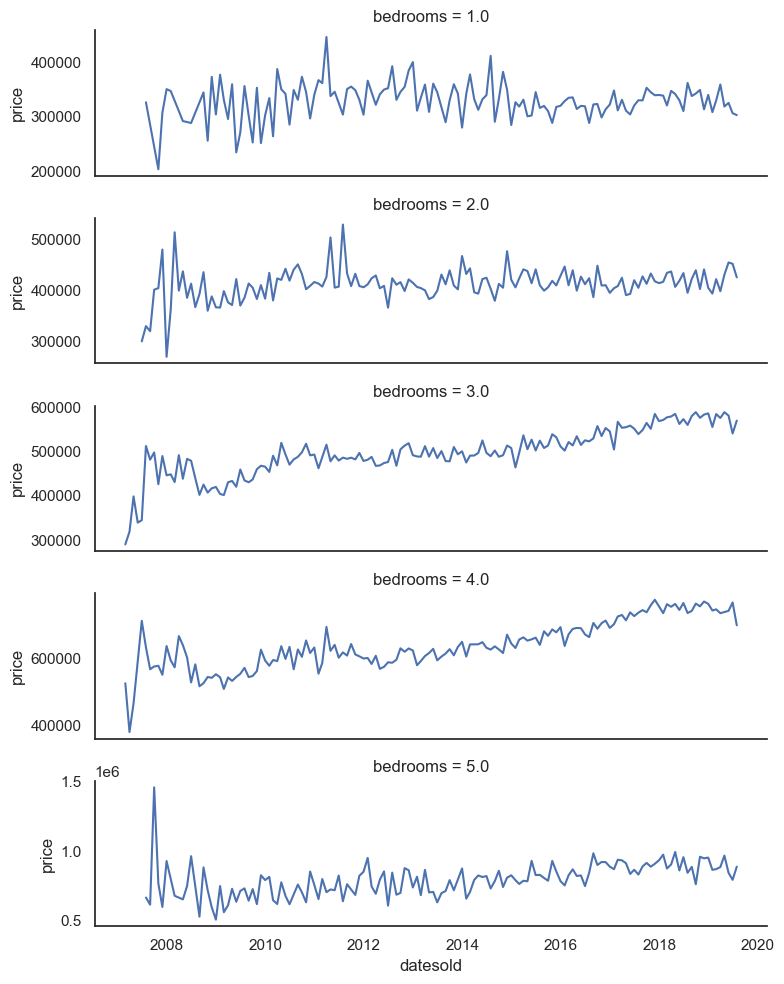

In [13]:
# Replot time series data after resampling
data_r = pd.concat([one_bed_r, two_bed_r, three_bed_r,
                       four_bed_r, five_bed_r]).reset_index()

grid = sns.FacetGrid(data_r, row='bedrooms', height=2, aspect=4, sharey=False)
grid.map(sns.lineplot, 'datesold', 'price', ci=None)

In [14]:
# Define function to help plot moving average
def moving_average(df, ser, window, scale=1.96):
    series = df[ser]
    # Calculate rolling mean
    rolling_mean = series.rolling(window=window).mean()
    
    # Calculate confidence intervals for smoothed values.
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window:] - rolling_mean[window:])
    lower_bound = rolling_mean - (mae + scale * deviation)
    upper_bound = rolling_mean + (mae + scale * deviation)
    rm_df = pd.concat([rolling_mean, lower_bound, upper_bound], axis = 1)
    rm_df.columns = ['Rolling Mean', 'Lower Bound', 'Upper Bound']
    
    # add to dataframe and return
    df = pd.concat([df, rm_df], axis=1)
    return df
    

In [15]:
# Calculate moving averages for 5, 30 and 90 day smoothing
one_bed_s5 = moving_average(one_bed_r, 'price', 5)
one_bed_s30 = moving_average(one_bed_r, 'price', 30)
one_bed_s90 = moving_average(one_bed_r, 'price', 90)

two_bed_s5 = moving_average(two_bed_r, 'price', 5)
two_bed_s30 = moving_average(two_bed_r, 'price', 30)
two_bed_s90 = moving_average(two_bed_r, 'price', 90)

three_bed_s5 = moving_average(three_bed_r, 'price', 5)
three_bed_s30 = moving_average(three_bed_r, 'price', 30)
three_bed_s90 = moving_average(three_bed_r, 'price', 90)

four_bed_s5 = moving_average(four_bed_r, 'price', 5)
four_bed_s30 = moving_average(four_bed_r, 'price', 30)
four_bed_s90 = moving_average(four_bed_r, 'price', 90)

five_bed_s5 = moving_average(five_bed_r, 'price', 5)
five_bed_s30 = moving_average(five_bed_r, 'price', 30)
five_bed_s90 = moving_average(five_bed_r, 'price', 90)

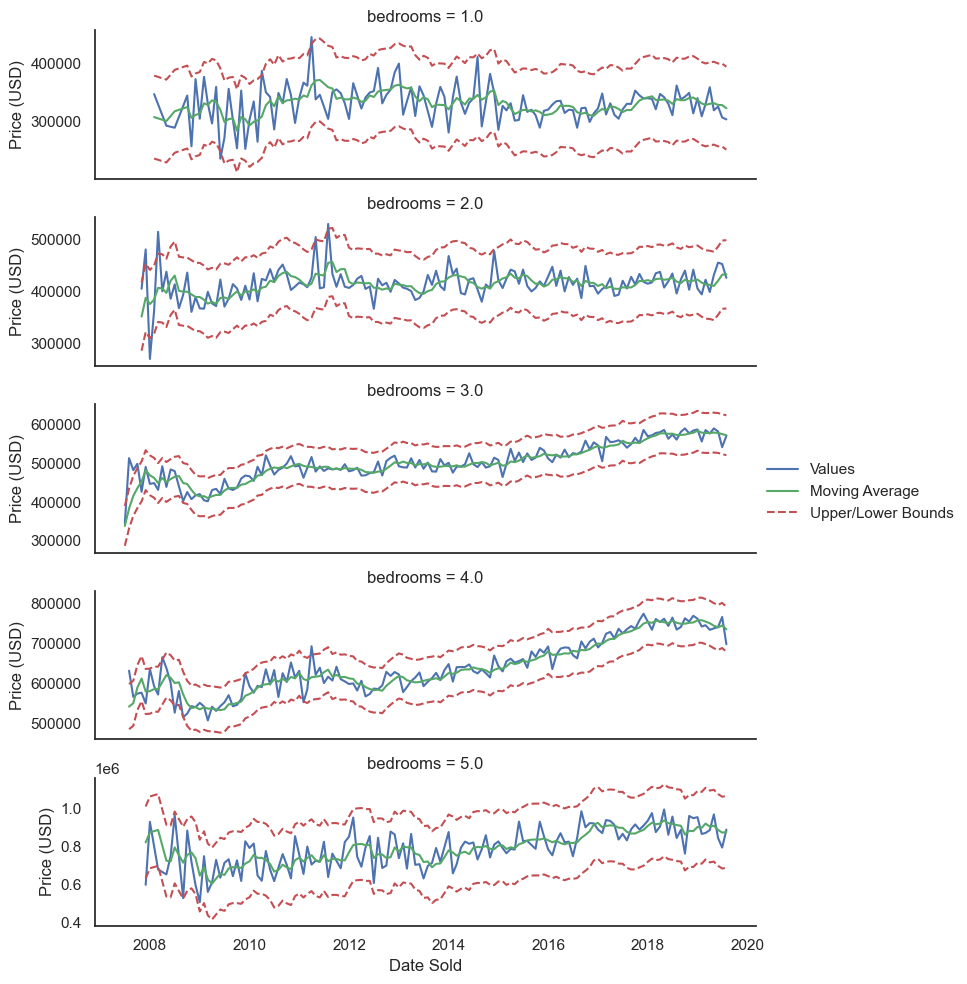

In [21]:
# Plot time series moving average - 5 data point smoothing
data_s5 = pd.concat([one_bed_s5, two_bed_s5, three_bed_s5,
                       four_bed_s5, five_bed_s5]).reset_index()

# Drop na values to only plot where calculated values are present.
data_s5.dropna(inplace=True)

grid = sns.FacetGrid(data_s5, row='bedrooms', height=2, aspect=4, sharey=False)
grid.map(sns.lineplot, 'datesold', 'price', color='b', label = 'Values')
grid.map(sns.lineplot, 'datesold', 'Rolling Mean', color='g', label = 'Moving Average')
grid.map(sns.lineplot, 'datesold', 'Lower Bound', color='r', linestyle='--', label = 'Upper/Lower Bounds')
grid.map(sns.lineplot, 'datesold', 'Upper Bound', color='r', linestyle='--')
grid.set_axis_labels('Date Sold', 'Price (USD)')
grid.add_legend()

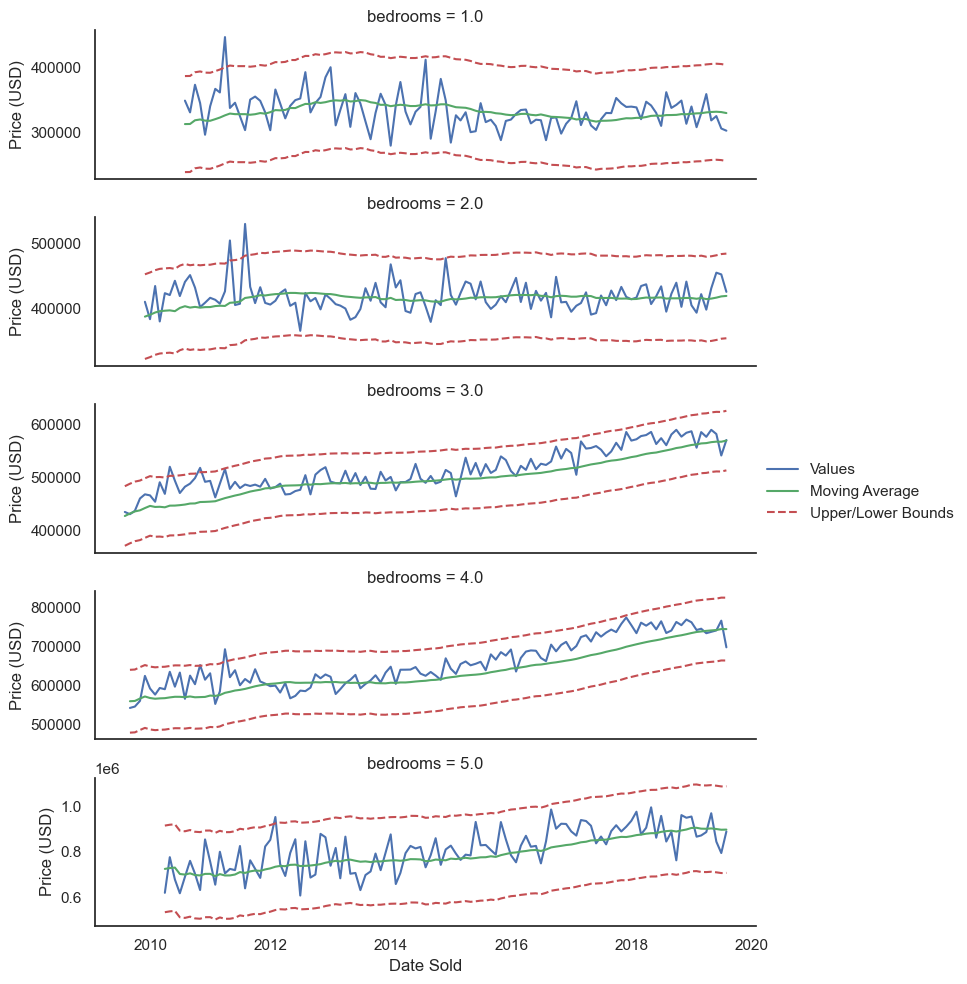

In [22]:
# Plot time series moving average - 30 data point smoothing
data_s30 = pd.concat([one_bed_s30, two_bed_s30, three_bed_s30,
                       four_bed_s30, five_bed_s30]).reset_index()

# Drop na values to only plot where calculated values are present.
data_s30.dropna(inplace=True)

grid = sns.FacetGrid(data_s30, row='bedrooms', height=2, aspect=4, sharey=False)
grid.map(sns.lineplot, 'datesold', 'price', color='b', label = 'Values')
grid.map(sns.lineplot, 'datesold', 'Rolling Mean', color='g', label = 'Moving Average')
grid.map(sns.lineplot, 'datesold', 'Lower Bound', color='r', linestyle='--', label = 'Upper/Lower Bounds')
grid.map(sns.lineplot, 'datesold', 'Upper Bound', color='r', linestyle='--')
grid.set_axis_labels('Date Sold', 'Price (USD)')
grid.add_legend()

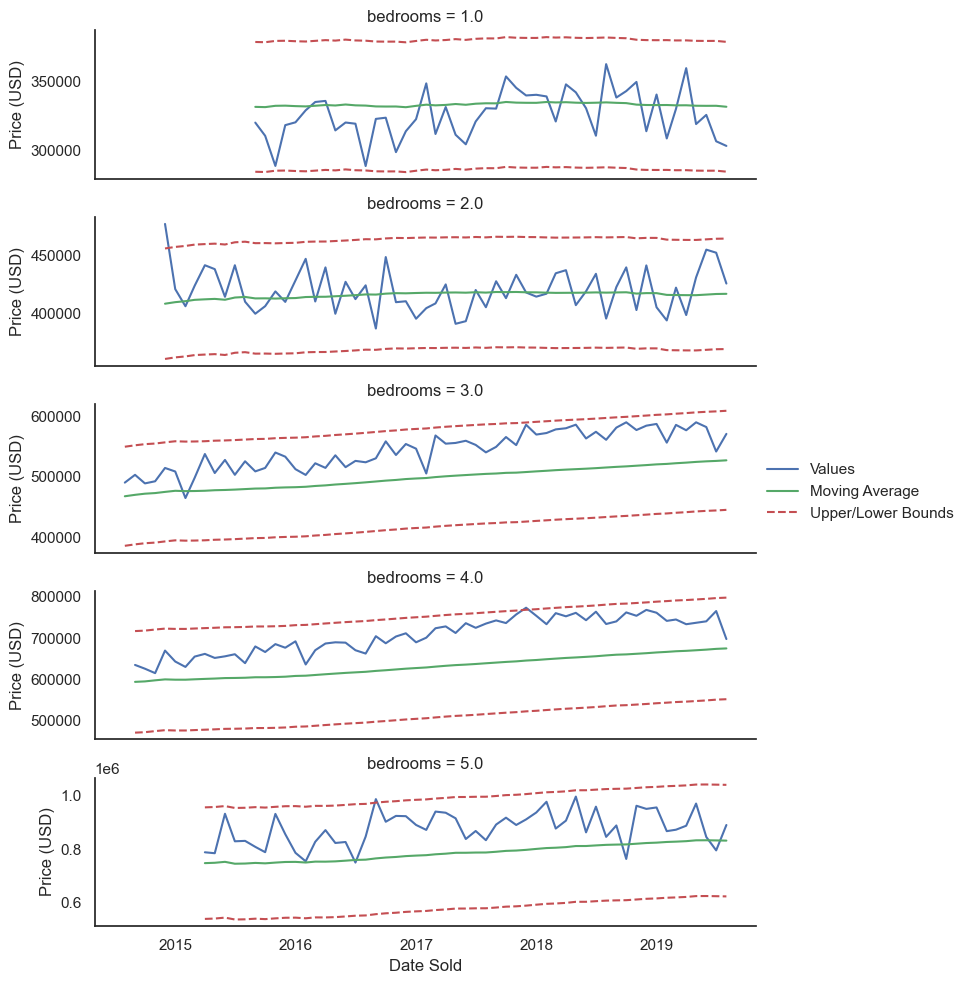

In [23]:
# Plot time series moving average - 90 data point smoothing
data_s90 = pd.concat([one_bed_s90, two_bed_s90, three_bed_s90,
                       four_bed_s90, five_bed_s90]).reset_index()

# Drop na values to only plot where calculated values are present.
data_s90.dropna(inplace=True)

grid = sns.FacetGrid(data_s90, row='bedrooms', height=2, aspect=4, sharey=False)
grid.map(sns.lineplot, 'datesold', 'price', color='b', label = 'Values')
grid.map(sns.lineplot, 'datesold', 'Rolling Mean', color='g', label = 'Moving Average')
grid.map(sns.lineplot, 'datesold', 'Lower Bound', color='r', linestyle='--', label = 'Upper/Lower Bounds')
grid.map(sns.lineplot, 'datesold', 'Upper Bound', color='r', linestyle='--')
grid.set_axis_labels('Date Sold', 'Price (USD)')
grid.add_legend()